# Introduction
## About our dataset
The dataset used this project is retrieved from kaggle, the home of Data Science. There are three parts to our report, as follows:

-> Data Cleaning and Feature Engineering                                                                                        
-> Exploratory Data Analysis                                                                                                     
-> Prediction of Loan Status                                                                                                    
The major objective of this project is to predict whether a client is eligible for the loan they are applying for based on certain information. Therefore, this is a supervised classification problem to be trained. Algorithms tested for this project include Logistic Regression, Decision Tree Classifier, Random Forest Classifier, KNearest Neighbors, Support Vector Classifier and XGBoost Classifier. Hyperparametric tuning will be performed by sklearn's GridSearchCV. We will compare the results of these models to discover which algorithm works better for this specific dataset.

In [1]:
# Importing all necessary libraries for the project
# Importing Libraries
import time
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Data
For this problem, we have a CSV file: Loan_Application.csv.

The "loan_application.csv" file serves as the sole source of information for developing a predictive model. This dataset likely comprises multiple columns, each representing a different aspect of a loan application.


Here we are reading the database using the name "data" in the variable.

In [2]:
# Reading the data
data = pd.read_csv('Loan_Application.csv')

pd.set_option('display.max_columns', None)

In [3]:
#Display the first 5 entries in our dataset
data.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,LoanStatus
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,1
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,1
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,0
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,1
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,1


In [4]:
data.columns

Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner',
       'LoanStatus'],
      dtype='object')

## Definition of Terms in the Dataset
LoanID:
A unique identifier assigned to each loan application for tracking and reference purposes.

Age:
The age of the individual applying for the loan. Age can be a factor in determining the loan's terms and conditions.

Income:
The total income of the loan applicant, including salary, bonuses, and other sources of income. Income is a crucial factor in assessing the applicant's ability to repay the loan.

LoanAmount:
The amount of money requested by the borrower in the loan application. This is the principal amount that the borrower is seeking.

CreditScore:
A numerical representation of the borrower's creditworthiness. It is calculated based on the individual's credit history and other financial behavior.

MonthsEmployed:
The number of months the applicant has been employed. Employment history is considered in the loan approval process.

NumCreditLines:
The total number of credit lines (credit cards, loans, etc.) that the applicant currently has.

InterestRate:
The rate at which interest is charged on the loan amount. The interest rate is a critical factor in determining the cost of the loan.

LoanTerm:
The duration for which the loan is approved, typically expressed in months. Common loan terms include 15, 20, or 30 years for mortgages.

DTIRatio (Debt-to-Income Ratio):
A financial metric that compares the borrower's monthly debt payments to their gross monthly income. It helps assess the borrower's ability to manage additional debt.

Education:
The highest level of education attained by the loan applicant. Education level may be considered in the loan approval process.

EmploymentType:
The type of employment or occupation of the loan applicant (e.g., full-time, part-time, self-employed). Employment status is crucial in evaluating stability and income.

MaritalStatus:
The marital status of the loan applicant, which may be a factor in assessing financial stability.

HasMortgage:
A binary indicator of whether the applicant currently has a mortgage on a property.

HasDependents:
A binary indicator of whether the applicant has dependents (e.g., children, other family members).

LoanPurpose:
The purpose for which the loan is requested (e.g., home purchase, education, car purchase)

HasCoSigner:
A binary indicator of whether there is a co-signer on the loan application.

Default:
A binary indicator of whether the borrower has defaulted on a loan in the past or, in the context of a predictive model, whether the model predicts a default in the future.

In [5]:
data.shape

(255347, 18)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  LoanStatus

# Data Cleaning

In [7]:
# First we create a dataframe that shows the percentage of null values in each column of df.
100*data.isnull().sum()/data.shape[0]

LoanID            0.0
Age               0.0
Income            0.0
LoanAmount        0.0
CreditScore       0.0
MonthsEmployed    0.0
NumCreditLines    0.0
InterestRate      0.0
LoanTerm          0.0
DTIRatio          0.0
Education         0.0
EmploymentType    0.0
MaritalStatus     0.0
HasMortgage       0.0
HasDependents     0.0
LoanPurpose       0.0
HasCoSigner       0.0
LoanStatus        0.0
dtype: float64

The dataset has been thoroughly reviewed, and it is confirmed that there are no null values present. No modifications were necessary, and the dataset remains complete without any missing values.

In [8]:
data.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,LoanStatus
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.883872
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,1.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,1.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,1.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


In [9]:
#Checking to see if there are duplicates
data.duplicated().sum()

0

In [10]:
data['LoanStatus'].value_counts()

1    225694
0     29653
Name: LoanStatus, dtype: int64

We can see that just 11.6% of the client stand a chance of their loans being approved by the bank while 88.4% are not eligible.

## Feature Engineering

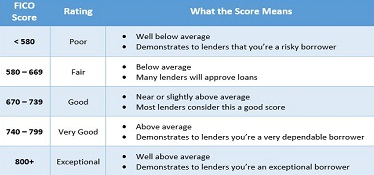


In [11]:
# Define bins to categorize Credit Scores into segments
bins = [0, 579, 669, 739, 799, float('inf')]
# Define labels for each Credit Score segment
labels = ['Poor', 'Fair', 'Good', 'Very Good', 'Exceptional']

# Create a new column 'CreditSegment' in the 'data' DataFrame
# Use the pd.cut() function to categorize 'CreditScore' values into the specified bins with corresponding labels
# right=False ensures that the intervals are left-closed, include_lowest=True includes the leftmost interval
data['CreditSegment'] = pd.cut(data['CreditScore'], bins=bins, labels=labels, right=False, include_lowest=True)

# Feature Extraction

In [12]:
# Mapping employment types to 'Employed'
data['EmploymentType'] = data['EmploymentType'].replace({'Full-time': 'Employed', 'Part-time': 'Employed', 'Self-employed': 'Employed'})


## Encoding Categorical Variables

Label encoding is used to convert categorical data, which is in the form of text labels, into numerical representations. This is important because many machine learning algorithms require numerical input. The LabelEncoder in scikit-learn assigns a unique integer to each unique category in the specified columns. This numeric representation allows algorithms to work with categorical data effectively. Each column is encoded separately to ensure that each category is represented consistently across different features.

In [13]:
from sklearn.preprocessing import LabelEncoder

# Label encode categorical features to convert them into numerical representation
# This is important because many machine learning algorithms work with numerical data, not categorical
# Each unique category in the specified columns is assigned a unique numerical label


# Education
le3=LabelEncoder()
le3.fit(data['Education'])
data['Education']=le3.transform(data['Education'])

#Marital Status
le2=LabelEncoder()
le2.fit(data['MaritalStatus'])
data['MaritalStatus']=le2.transform(data['MaritalStatus'])

# Has Mortage
le1=LabelEncoder()
le1.fit(data['HasMortgage'])
data['HasMortgage']=le1.transform(data['HasMortgage'])

# Has CoSigner
le4=LabelEncoder()
le4.fit(data['HasCoSigner'])
data['HasCoSigner']=le4.transform(data['HasCoSigner'])

# Employment Types
le5=LabelEncoder()
le5.fit(data['EmploymentType'])
data['EmploymentType']=le5.transform(data['EmploymentType'])

# Loan Purpose
le6=LabelEncoder()
le6.fit(data['LoanPurpose'])
data['LoanPurpose']=le6.transform(data['LoanPurpose'])

#Has dependents
le7=LabelEncoder()
le7.fit(data['HasDependents'])
data['HasDependents']=le7.transform(data['HasDependents'])

#Credit Segment
le7=LabelEncoder()
le7.fit(data['CreditSegment'])
data['CreditSegment']=le7.transform(data['CreditSegment'])

In [14]:
data.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,LoanStatus,CreditSegment
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,0,0,0,1,1,4,1,1,3
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,2,0,1,0,0,4,1,1,3
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,2,1,0,1,1,0,0,0,3
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,1,0,1,0,0,1,0,1,4
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,0,1,0,0,1,0,0,1,1


# Checking correlations with the target variable

In [15]:
# target variable is the Default 
# Calculate the correlation of all features with the 'Default' target variable
corr_matrix = data.corrwith(data['LoanStatus'])

# Sort the correlation values in descending order
sorted_corr = corr_matrix.sort_values(ascending=False)

# Display the correlation matrix
print(sorted_corr)

LoanStatus        1.000000
Age               0.167783
Income            0.099119
MonthsEmployed    0.097374
HasCoSigner       0.039109
HasDependents     0.034678
CreditScore       0.034166
HasMortgage       0.022856
Education         0.022835
LoanPurpose       0.010096
MaritalStatus     0.007902
LoanTerm         -0.000545
CreditSegment    -0.015250
DTIRatio         -0.019236
NumCreditLines   -0.028330
EmploymentType   -0.034957
LoanAmount       -0.086659
InterestRate     -0.131273
dtype: float64


## Dropping Columns 

In [16]:
# Manually dropping multiple columns
columns_to_drop = ['LoanID', 'DTIRatio', 'CreditSegment', 'InterestRate', 'NumCreditLines', 'CreditScore']
data = data.drop(columns=columns_to_drop, axis=1)

In [17]:
# target variable is the Default 
# Calculate the correlation of all features with the 'Default' target variable
corr_matrix = data.corrwith(data['LoanStatus'])

# Sort the correlation values in descending order
sorted_corr = corr_matrix.sort_values(ascending=False)

# Display the correlation matrix
print(sorted_corr)

LoanStatus        1.000000
Age               0.167783
Income            0.099119
MonthsEmployed    0.097374
HasCoSigner       0.039109
HasDependents     0.034678
HasMortgage       0.022856
Education         0.022835
LoanPurpose       0.010096
MaritalStatus     0.007902
LoanTerm         -0.000545
EmploymentType   -0.034957
LoanAmount       -0.086659
dtype: float64


In [18]:
data.head()

,Age,Income,LoanAmount,MonthsEmployed,LoanTerm,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,LoanStatus
0,56,85994,50587,80,36,0,0,0,1,1,4,1,1
1,69,50432,124440,15,60,2,0,1,0,0,4,1,1
2,46,84208,129188,26,24,2,1,0,1,1,0,0,0
3,32,31713,44799,0,24,1,0,1,0,0,1,0,1
4,60,20437,9139,8,48,0,1,0,0,1,0,0,1


<AxesSubplot:xlabel='HasMortgage'>

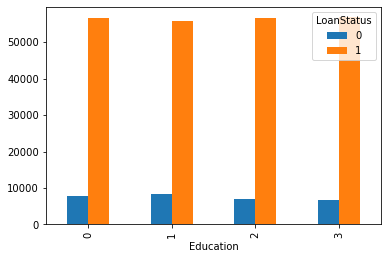

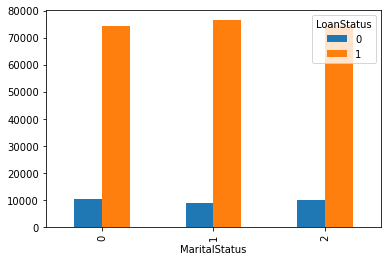

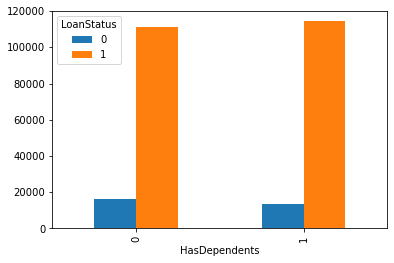

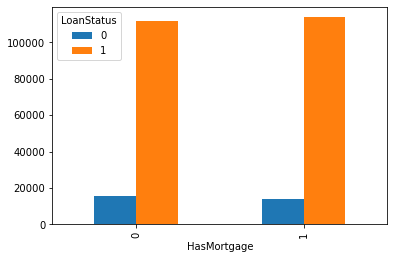

In [19]:
# Create a bar plot showing the relationship between Education and LoanStatus
pd.crosstab(data['Education'], data.LoanStatus).plot(kind="bar")

# Create a bar plot showing the relationship between MaritalStatus and LoanStatus
pd.crosstab(data['MaritalStatus'], data.LoanStatus).plot(kind="bar")

# Create a bar plot showing the relationship between HasDependents and LoanStatus
pd.crosstab(data['HasDependents'], data.LoanStatus).plot(kind="bar")

# Create a bar plot showing the relationship between HasMortgage and LoanStatus
pd.crosstab(data['HasMortgage'], data.LoanStatus).plot(kind="bar")


# Predicting Loan Status

## Feature Scaling

In [20]:
X=data.drop(['LoanStatus'],axis=1)
Y=data['LoanStatus']

In [21]:
# Import the SMOTE (Synthetic Minority Over-sampling Technique) from imbalanced-learn library
from imblearn.over_sampling import SMOTE

# Create an instance of the SMOTE algorithm with a specified random state
smote = SMOTE(random_state=42)

# Apply the SMOTE algorithm to generate synthetic samples for the minority class
# X is the feature matrix, and Y is the corresponding target variable
Xr, yr = smote.fit_resample(X, Y)

###  SMOTE Summary:

SMOTE, or Synthetic Minority Over-sampling Technique, is a method designed to address class imbalance in machine learning datasets where the minority class instances are significantly outnumbered by the majority class.                                                                                                                                
SMOTE is valuable for preventing model bias towards the majority class. It improves the performance of machine learning algorithms, particularly in situations where class imbalance poses a challenge.
In summary, SMOTE is a powerful technique that enhances the learning ability of models by providing a more representative dataset, ultimately leading to improved model generalization and performance, especially in the face of imbalanced class distributions.

## Data Preparation for Model Training

In [22]:
Xr.head()

,Age,Income,LoanAmount,MonthsEmployed,LoanTerm,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,56,85994,50587,80,36,0,0,0,1,1,4,1
1,69,50432,124440,15,60,2,0,1,0,0,4,1
2,46,84208,129188,26,24,2,1,0,1,1,0,0
3,32,31713,44799,0,24,1,0,1,0,0,1,0
4,60,20437,9139,8,48,0,1,0,0,1,0,0


### After performing SMOTE to balance the loan status column

<AxesSubplot:xlabel='Education'>

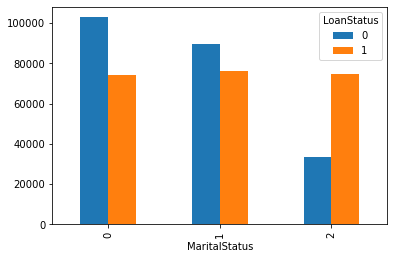

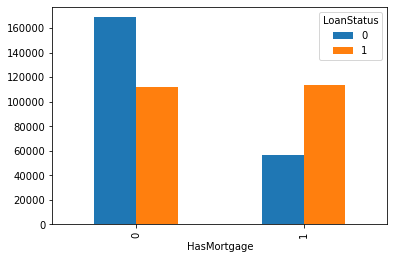

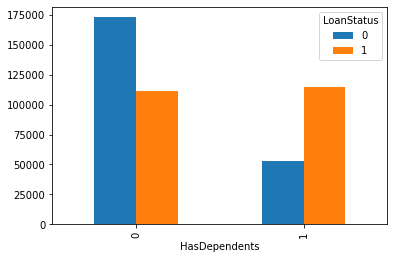

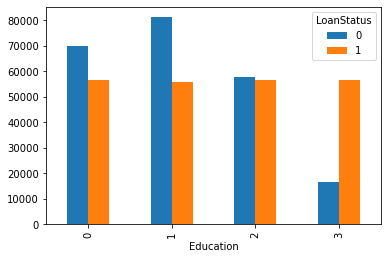

In [23]:
pd.crosstab(Xr['MaritalStatus'], yr).plot(kind="bar")
pd.crosstab(Xr['HasMortgage'], yr).plot(kind="bar")
pd.crosstab(Xr['HasDependents'], yr).plot(kind="bar")
pd.crosstab(Xr['Education'], yr).plot(kind="bar")

## Splitting data

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [25]:
X_train, X_test, y_train, y_test = train_test_split(Xr, yr, test_size=0.2,random_state=0)

In [26]:
# Standardize the features 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Defining the models

In [27]:
# Define a list of models
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    KNeighborsClassifier(),
]

## Model Training

In [28]:
import pickle

In [29]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [30]:
best_model = None
best_accuracy = 0.0

# Iterate through the models
for model in models:
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    # Calculate accuracy
    score = accuracy_score(y_pred, y_test)

    # Display results
    model_name = model.__class__.__name__
    print(f'{model_name} - Accuracy: {score:.4f}')

    # Check if the current model has a higher accuracy
    if score > best_accuracy:
        best_accuracy = score
        best_model = model

              precision    recall  f1-score   support

           0       0.76      0.78      0.77     44980
           1       0.78      0.76      0.77     45298

    accuracy                           0.77     90278
   macro avg       0.77      0.77      0.77     90278
weighted avg       0.77      0.77      0.77     90278

LogisticRegression - Accuracy: 0.7709
              precision    recall  f1-score   support

           0       0.81      0.84      0.82     44980
           1       0.84      0.80      0.82     45298

    accuracy                           0.82     90278
   macro avg       0.82      0.82      0.82     90278
weighted avg       0.82      0.82      0.82     90278

DecisionTreeClassifier - Accuracy: 0.8222
              precision    recall  f1-score   support

           0       0.88      0.86      0.87     44980
           1       0.86      0.88      0.87     45298

    accuracy                           0.87     90278
   macro avg       0.87      0.87      0.87     

In [31]:
# Print the best model
best_model_name = best_model.__class__.__name__
print(f'\nThe best model is {best_model_name} with an accuracy of {best_accuracy:.4f}')


The best model is RandomForestClassifier with an accuracy of 0.8704


This accuracy value indicates that the RandomForestClassifier correctly predicted the target variable (or class) for approximately 87.04% of the total instances in the dataset.

In [32]:
# Define the RandomForestClassifier
model = RandomForestClassifier(random_state=0)

In [33]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [34]:
y_pred = model.predict(X_test)

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87     44980
           1       0.86      0.88      0.87     45298

    accuracy                           0.87     90278
   macro avg       0.87      0.87      0.87     90278
weighted avg       0.87      0.87      0.87     90278



In [36]:
# Map the numerical predictions to textual labels
y_pred_text = ["Eligible" if pred == 1 else "Not Eligible" for pred in y_pred]


In [37]:
# Now, y_pred_text contains the predictions as 'Eligible' or 'Not Eligible'
print(y_pred_text)

['Eligible', 'Eligible', 'Not Eligible', 'Not Eligible', 'Eligible', 'Eligible', 'Not Eligible', 'Not Eligible', 'Not Eligible', 'Eligible', 'Not Eligible', 'Not Eligible', 'Eligible', 'Eligible', 'Not Eligible', 'Not Eligible', 'Not Eligible', 'Eligible', 'Not Eligible', 'Eligible', 'Eligible', 'Not Eligible', 'Eligible', 'Not Eligible', 'Not Eligible', 'Not Eligible', 'Not Eligible', 'Not Eligible', 'Eligible', 'Eligible', 'Not Eligible', 'Eligible', 'Not Eligible', 'Eligible', 'Eligible', 'Eligible', 'Eligible', 'Eligible', 'Not Eligible', 'Eligible', 'Eligible', 'Not Eligible', 'Eligible', 'Not Eligible', 'Eligible', 'Eligible', 'Not Eligible', 'Not Eligible', 'Not Eligible', 'Not Eligible', 'Eligible', 'Eligible', 'Eligible', 'Not Eligible', 'Not Eligible', 'Not Eligible', 'Eligible', 'Eligible', 'Not Eligible', 'Eligible', 'Not Eligible', 'Not Eligible', 'Eligible', 'Not Eligible', 'Not Eligible', 'Eligible', 'Eligible', 'Not Eligible', 'Eligible', 'Not Eligible', 'Not Eligible',

## Saving the model

In [38]:
import pickle
with open('Final.pkl', 'wb') as f:
    pickle.dump(model, f)

In [39]:
model = pickle.load(open('Final.pkl','rb'))
print(model)

RandomForestClassifier(random_state=0)


# Fine tunning using Gridsearch

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
# Define the RandomForestClassifier
model = RandomForestClassifier(random_state=0)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 75, 100],
    'max_depth': [None, 1, 3, 5],
    'min_samples_split': [2, 3, 5],
    'min_samples_leaf': [1, 2, 3]
}

In [42]:
# Create GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=2, scoring='accuracy', verbose=3, n_jobs=-1)



In [43]:
# Fit the GridSearchCV
grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 108 candidates, totalling 216 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [None, 1, 3, 5],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [50, 75, 100]},
             scoring='accuracy', verbose=3)

In [44]:
# Best model parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best score: 0.854866938052117


In [45]:
# Evaluate the model on test set
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Test set score:", test_score)

Test set score: 0.8701455504109529


This accuracy value indicates that, after fine-tuning, the RandomForestClassifier correctly predicted the target variable for approximately 87.01% of the instances in the test set.